In [0]:
dbutils.library.installPyPI('h2o-pysparkling-2.4')

Out[1]: True

In [0]:
from pysparkling import * # Import PySparkling
import h2o
hc = H2OContext.getOrCreate()

Connecting to H2O server at http://10.139.64.5:9009 ... successful.
-------------------------- -------------------------------------------------------------------------------------------------------
H2O_cluster_uptime: 12 hours 23 mins
H2O_cluster_timezone: Etc/UTC
H2O_data_parsing_timezone: UTC
H2O_cluster_version: 3.32.0.1
H2O_cluster_version_age: 1 month and 8 days
H2O_cluster_name: sparkling-water-root_app-20201116210719-0000
H2O_cluster_total_nodes: 4
H2O_cluster_free_memory: 20.24 Gb
H2O_cluster_total_cores: 16
H2O_cluster_allowed_cores: 16
H2O_cluster_status: locked, healthy
H2O_connection_url: http://10.139.64.5:9009
H2O_connection_proxy: null
H2O_internal_security: False
H2O_API_Extensions: XGBoost, Algos, Amazon S3, Sparkling Water REST API Extensions, AutoML, Core V3, TargetEncoder, Core V4
Python_version: 3.7.3 final
-------------------------- -------------------------------------------------------------------------------------------------------

Sparkling Water Context:
 * Sparkling Water Version: 3.32.0.1-2-2.4
 * H2O name: root
 * cluster size: 4
 * list of used nodes:
 (executorId, host, port)
 ------------------------
 (0,10.139.64.4,54321)
 (1,10.139.64.6,54321)
 (2,10.139.64.7,54321)
 (3,10.139.64.8,54321)
 ------------------------

 Open H2O Flow in browser: https://westeurope.azuredatabricks.net/driver-proxy/o/8767374559588946/1016-113926-refer971/9009/flow/index.html (CMD + click in Mac OSX)

In [0]:
import pandas as pd

spark.conf.set("spark.sql.execution.arrow.enabled", "false")
from pyspark.sql.functions import *
import warnings
warnings.filterwarnings("ignore")

In [0]:
#importing my libraries
from pysparkling.ml import H2OAutoML
from pyspark.ml import Pipeline
from pyspark.ml.feature import SQLTransformer

In [0]:
df=spark.table('churn.train_data_2019_2020_all_loc')
display(df)

user_id tag_churn total_owned_products total_paid_for_product num_distinct_merchant_ids num_distinct_merchant_categories num_days_before_endyear_active_redemption diff_num_months_1st_last avg_recency_days median_monthly_spend total_monthly_spend_redemptions num_of_weeks_redemptions num_of_months_redemptions num_of_days_redemptions count_of_total_redemptions total_spend gender tenure_inapp has_connect has_redem_buffet count_num_areas min_spend_redem max_spend_redem median_spend_redem median_num_days_permonth_active avg_weekly_sessions_active total_sessions_monthly avg_monthly_sessions_active avg_recency_days_inapp num_days_before_endyear_active_session num_distinct_months_active num_distinct_days_active total_sessions advancesearch categoryhome favourites home merchantdetail notifications offers offerslist product quicksearch redemptioncard num_days_before_end_purchased offertime_of_purchase tag_nationality percentage_activity_of_redeem_appvisit age_group cor_tag num_of_merchants_interacted percentage_of_merchants_redeem_present zero_redeemer is_savings_morethan_paid updated_on location_id location_name 3596350 1 List(D19CTCHCP) 24.7 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 f 2.0 0.0 0.0 0.0 0.0 0.0 0.0 5.0 6.0 10.0 15.0 6.0 -51.0 11.0 55.0 207.0 28.0 32.0 1.0 54.0 36.0 10.0 25.0 11.0 3.0 0.0 8.0 176.0 other ZA 0.0 45_55 local 83.0 0.0 1 0 06-11-2020 4 Cape Town 6180328 1 List(D19CTCHCP) 24.78 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 m 1.0 0.0 0.0 0.0 0.0 0.0 0.0 5.0 2.0 23.0 10.5 6.0 -46.0 12.0 63.0 141.0 8.0 26.0 6.0 89.0 29.0 26.0 10.0 20.0 5.0 10.0 10.0 320.0 early_bird ZA 0.0 55+ local 22.0 0.0 1 0 06-11-2020 4 Cape Town 3347399 1 List(D19CTCHCP) 24.48 1.0 1.0 285.0 0.0 0.0 10.0 10.0 1.0 1.0 1.0 1.0 10.0 f 2.0 0.0 0.0 1.0 10.0 10.0 10.0 21.0 6.0 60.0 27.0 2.0 -40.0 11.0 184.0 287.0 7.0 26.0 1.0 48.0 28.0 1.0 21.0 29.0 0.0 3.0 4.0 299.0 early_bird ZA 1.0 25_35 local 131.0 1.0 0 0 06-11-2020 4 Cape Town 6128526 1 List(D19CTCHCP) 24.78 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 f 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.5 2.0 23.0 2.5 19.0 7.0 8.0 16.0 42.0 29.0 45.0 2.0 105.0 52.0 7.0 19.0 36.0 0.0 0.0 29.0 325.0 early_bird ZA 0.0 45_55 local 89.0 0.0 1 0 06-11-2020 4 Cape Town 8887354 1 List(D19CTCHCP) 23.5 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 m 0.0 0.0 0.0 0.0 0.0 0.0 0.0 3.0 1.0 9.0 5.5 8.0 -16.0 2.0 6.0 11.0 18.0 9.0 0.0 45.0 18.0 0.0 18.0 0.0 36.0 0.0 18.0 29.0 other ZA 0.0 55+ local 6.0 0.0 1 0 06-11-2020 4 Cape Town 2231986 1 List(D19CTCHCP) 24.05 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 f 3.0 0.0 0.0 0.0 0.0 0.0 0.0 5.5 2.0 14.0 17.0 6.0 -34.0 12.0 61.0 195.0 18.0 53.0 1.0 68.0 49.0 14.0 21.0 37.0 1.0 0.0 31.0 361.0 early_bird ZA 0.0 25_35 local 252.0 0.0 1 0 06-11-2020 4 Cape Town 3567998 1 List(D19CTCHCP) 24.48 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 f 2.0 0.0 0.0 0.0 0.0 0.0 0.0 6.5 3.0 52.0 14.5 4.0 -52.0 12.0 85.0 231.0 14.0 41.0 3.0 83.0 34.0 16.0 17.0 20.0 7.0 0.0 19.0 298.0 early_bird ZA 0.0 55+ local 105.0 0.0 1 0 06-11-2020 4 Cape Town 5641069 1 List(D19CTCHCP) 23.7 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 f 1.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 2.0 16.0 3.5 14.0 -23.0 10.0 23.0 50.0 20.0 38.0 2.0 84.0 34.0 28.0 10.0 14.0 4.0 0.0 18.0 390.0 early_bird ZA 0.0 45_55 local 18.0 0.0 1 0 06-11-2020 4 Cape Town 3479626 1 List(D19CTCHCP) 48.5 3.0 1.0 44.0 5.0 14.0 22.5 10.0 10.0 6.0 10.0 11.0 127.0 f 2.0 0.0 0.0 2.0 10.0 15.0 10.0 4.0 5.0 5.0 12.0 7.0 -52.0 12.0 47.0 205.0 7.0 36.0 4.0 78.0 40.0 13.0 18.0 33.0 6.0 1.0 14.0 142.0 other ZA 21.0 45_55 local 124.0 3.0 0 1 06-11-2020 4 Cape Town 7571776 1 List(D19CTCHCP) 24.7 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 f 0.0 0.0 0.0 0.0 0.0 0.0 0.0 12.0 8.0 31.0 34.5 3.0 -42.0 8.0 90.0 305.0 12.0 33.0 11.0 67.0 32.0 21.0 27.0 28.0 8.0 2.0 15.0 184.0 other ZA 0.0 25_35 local 212.0 0.0 1 0 06-11-2020 4 Cape Town 8068480 1 List(D19CTCHCP) 24.25 1.0 1.0 126.0 0.0 0.0 58.0 58.0 1.0 1.0 1.0 2.0 58.0 f 0.0 0.0 0.0 1.0 29.0 29.0 29.0 7.0 

In [0]:
df_perloc=df[df.location_id==9]
display(df_perloc)

user_id tag_churn total_owned_products total_paid_for_product num_distinct_merchant_ids num_distinct_merchant_categories num_days_before_endyear_active_redemption diff_num_months_1st_last avg_recency_days median_monthly_spend total_monthly_spend_redemptions num_of_weeks_redemptions num_of_months_redemptions num_of_days_redemptions count_of_total_redemptions total_spend gender tenure_inapp has_connect has_redem_buffet count_num_areas min_spend_redem max_spend_redem median_spend_redem median_num_days_permonth_active avg_weekly_sessions_active total_sessions_monthly avg_monthly_sessions_active avg_recency_days_inapp num_days_before_endyear_active_session num_distinct_months_active num_distinct_days_active total_sessions advancesearch categoryhome favourites home merchantdetail notifications offers offerslist product quicksearch redemptioncard num_days_before_end_purchased offertime_of_purchase tag_nationality percentage_activity_of_redeem_appvisit age_group cor_tag num_of_merchants_interacted percentage_of_merchants_redeem_present zero_redeemer is_savings_morethan_paid updated_on location_id location_name 4592721 0 List(D19QTQTCP) 299.74 9.0 1.0 4.0 10.0 19.0 110.0 100.0 13.0 9.0 14.0 15.0 1085.0 m 1.0 0.0 1.0 4.0 45.0 230.0 60.0 3.0 3.0 4.0 7.0 9.0 -45.0 11.0 38.0 108.0 35.0 5.0 0.0 51.0 31.0 6.0 2.0 2.0 0.0 0.0 17.0 359.0 early_bird EG 37.0 35_45 local 17.0 9.0 0 1 05-11-2020 9 Qatar 3432631 0 List(D19QTQTCP) 299.96 7.0 1.0 3.0 10.0 33.0 54.0 90.0 7.0 5.0 8.0 9.0 373.0 m 2.0 0.0 0.0 3.0 19.0 60.0 45.0 6.0 5.0 32.0 17.0 4.0 -54.0 11.0 102.0 180.0 8.0 9.0 0.0 35.0 21.0 2.0 2.0 4.0 1.0 8.0 5.0 375.0 early_bird other 8.0 35_45 local 29.0 7.0 0 1 05-11-2020 9 Qatar 1356806 0 List(D19QTQTCP) 228.61 14.0 4.0 4.0 5.0 7.0 195.0 45.0 14.0 7.0 18.0 22.0 3208.0 m 3.0 0.0 1.0 7.0 18.0 1250.0 55.0 8.0 4.0 73.0 22.5 3.0 -45.0 8.0 70.0 251.0 6.0 11.0 1.0 90.0 47.0 8.0 6.0 6.0 2.0 50.0 24.0 169.0 other QA 26.0 35_45 local 183.0 14.0 0 1 05-11-2020 9 Qatar 1479562 0 List(D19QTQTCP) 299.96 23.0 2.0 5.0 10.0 9.0 185.0 335.0 22.0 9.0 29.0 35.0 1415.0 m 3.0 0.0 1.0 12.0 9.0 160.0 39.0 22.5 14.0 210.0 65.5 2.0 -54.0 12.0 235.0 960.0 21.0 21.0 0.0 74.0 34.0 2.0 18.0 23.0 1.0 12.0 13.0 388.0 early_bird IN 12.0 35_45 local 197.0 23.0 0 1 05-11-2020 9 Qatar 605863 0 List(D19QTQTCP) 599.48 37.0 4.0 2.0 10.0 3.0 360.0 1220.0 31.0 11.0 64.0 96.0 6225.0 m 4.0 1.0 0.0 17.0 8.0 750.0 40.0 15.5 13.0 72.0 59.5 2.0 -54.0 12.0 198.0 962.0 18.0 35.0 1.0 58.0 47.0 2.0 16.0 23.0 1.0 0.0 16.0 342.0 early_bird other 32.0 25_35 local 394.0 37.0 0 1 05-11-2020 9 Qatar 3740637 0 List(D19QTQTCP) 598.12 3.0 1.0 132.0 3.0 19.0 90.0 64.0 4.0 3.0 4.0 5.0 274.0 m 2.0 0.0 0.0 3.0 19.0 120.0 45.0 5.5 3.0 17.0 10.5 8.0 -53.0 10.0 48.0 104.0 28.0 21.0 3.0 68.0 28.0 10.0 12.0 7.0 4.0 0.0 17.0 308.0 early_bird other 8.0 55+ local 49.0 3.0 0 0 05-11-2020 9 Qatar 1810411 0 List(D19QTQTCP) 299.74 8.0 1.0 5.0 10.0 21.0 90.0 21.0 9.0 7.0 9.0 14.0 982.0 m 3.0 0.0 1.0 5.0 20.0 225.0 45.0 8.5 7.0 29.0 24.5 3.0 -27.0 12.0 106.0 305.0 30.0 22.0 0.0 58.0 38.0 7.0 15.0 11.0 1.0 0.0 15.0 367.0 early_bird QA 8.0 35_45 local 225.0 8.0 0 1 05-11-2020 9 Qatar 3340887 0 List(D19QTQTCP) 299.96 30.0 2.0 1.0 10.0 5.0 505.0 180.0 30.0 11.0 47.0 57.0 6014.0 m 2.0 0.0 1.0 10.0 13.0 300.0 100.0 14.5 13.0 36.0 45.5 2.0 -52.0 12.0 171.0 638.0 30.0 41.0 0.0 76.0 45.0 5.0 3.0 16.0 1.0 2.0 14.0 392.0 early_bird other 27.0 35_45 local 187.0 30.0 0 1 05-11-2020 9 Qatar 2809418 1 List(D19QTQTCP) 228.09 4.0 2.0 92.0 3.0 16.0 55.0 30.0 3.0 4.0 4.0 6.0 609.0 m 2.0 0.0 0.0 4.0 9.0 340.0 40.0 12.0 4.0 39.0 19.0 2.0 83.0 7.0 89.0 165.0 17.0 30.0 3.0 70.0 34.0 10.0 21.0 22.0 5.0 6.0 20.0 266.0 early_bird PH 4.0 45_55 local 68.0 4.0 0 1 05-11-2020 9 Qatar 2830757 1 List(D19QTQTCP) 228.09 5.0 1.0 22.0 8.0 25.0 85.0 175.0 8.0 5.0 9.0 9.0 509.0 m 2.0 0.0 1.0 6.0 8.0 175.0 50.0 6.5 4.0 16.0 16.0 7.0 22.0 6.0 35.0 100.0 78.0 4.0 0.0 69.0 64.0 2.0 4.0 3.0 5.0 0.0 32.0 263.0 early_bird other 26.0 35_45 local 51.0 5.0 0 1 05-11-202

In [0]:
df_perloc.count()

Out[7]: 28405

In [0]:
train=df_perloc.drop('user_id','location_id','location_name','updated_on') #remove certain features not part of modelling
display(train)

tag_churn total_owned_products total_paid_for_product num_distinct_merchant_ids num_distinct_merchant_categories num_days_before_endyear_active_redemption diff_num_months_1st_last avg_recency_days median_monthly_spend total_monthly_spend_redemptions num_of_weeks_redemptions num_of_months_redemptions num_of_days_redemptions count_of_total_redemptions total_spend gender tenure_inapp has_connect has_redem_buffet count_num_areas min_spend_redem max_spend_redem median_spend_redem median_num_days_permonth_active avg_weekly_sessions_active total_sessions_monthly avg_monthly_sessions_active avg_recency_days_inapp num_days_before_endyear_active_session num_distinct_months_active num_distinct_days_active total_sessions advancesearch categoryhome favourites home merchantdetail notifications offers offerslist product quicksearch redemptioncard num_days_before_end_purchased offertime_of_purchase tag_nationality percentage_activity_of_redeem_appvisit age_group cor_tag num_of_merchants_interacted percentage_of_merchants_redeem_present zero_redeemer is_savings_morethan_paid 0 List(D19QTQTCP) 299.74 9.0 1.0 4.0 10.0 19.0 110.0 100.0 13.0 9.0 14.0 15.0 1085.0 m 1.0 0.0 1.0 4.0 45.0 230.0 60.0 3.0 3.0 4.0 7.0 9.0 -45.0 11.0 38.0 108.0 35.0 5.0 0.0 51.0 31.0 6.0 2.0 2.0 0.0 0.0 17.0 359.0 early_bird EG 37.0 35_45 local 17.0 9.0 0 1 0 List(D19QTQTCP) 299.96 7.0 1.0 3.0 10.0 33.0 54.0 90.0 7.0 5.0 8.0 9.0 373.0 m 2.0 0.0 0.0 3.0 19.0 60.0 45.0 6.0 5.0 32.0 17.0 4.0 -54.0 11.0 102.0 180.0 8.0 9.0 0.0 35.0 21.0 2.0 2.0 4.0 1.0 8.0 5.0 375.0 early_bird other 8.0 35_45 local 29.0 7.0 0 1 0 List(D19QTQTCP) 228.61 14.0 4.0 4.0 5.0 7.0 195.0 45.0 14.0 7.0 18.0 22.0 3208.0 m 3.0 0.0 1.0 7.0 18.0 1250.0 55.0 8.0 4.0 73.0 22.5 3.0 -45.0 8.0 70.0 251.0 6.0 11.0 1.0 90.0 47.0 8.0 6.0 6.0 2.0 50.0 24.0 169.0 other QA 26.0 35_45 local 183.0 14.0 0 1 0 List(D19QTQTCP) 299.96 23.0 2.0 5.0 10.0 9.0 185.0 335.0 22.0 9.0 29.0 35.0 1415.0 m 3.0 0.0 1.0 12.0 9.0 160.0 39.0 22.5 14.0 210.0 65.5 2.0 -54.0 12.0 235.0 960.0 21.0 21.0 0.0 74.0 34.0 2.0 18.0 23.0 1.0 12.0 13.0 388.0 early_bird IN 12.0 35_45 local 197.0 23.0 0 1 0 List(D19QTQTCP) 599.48 37.0 4.0 2.0 10.0 3.0 360.0 1220.0 31.0 11.0 64.0 96.0 6225.0 m 4.0 1.0 0.0 17.0 8.0 750.0 40.0 15.5 13.0 72.0 59.5 2.0 -54.0 12.0 198.0 962.0 18.0 35.0 1.0 58.0 47.0 2.0 16.0 23.0 1.0 0.0 16.0 342.0 early_bird other 32.0 25_35 local 394.0 37.0 0 1 0 List(D19QTQTCP) 598.12 3.0 1.0 132.0 3.0 19.0 90.0 64.0 4.0 3.0 4.0 5.0 274.0 m 2.0 0.0 0.0 3.0 19.0 120.0 45.0 5.5 3.0 17.0 10.5 8.0 -53.0 10.0 48.0 104.0 28.0 21.0 3.0 68.0 28.0 10.0 12.0 7.0 4.0 0.0 17.0 308.0 early_bird other 8.0 55+ local 49.0 3.0 0 0 0 List(D19QTQTCP) 299.74 8.0 1.0 5.0 10.0 21.0 90.0 21.0 9.0 7.0 9.0 14.0 982.0 m 3.0 0.0 1.0 5.0 20.0 225.0 45.0 8.5 7.0 29.0 24.5 3.0 -27.0 12.0 106.0 305.0 30.0 22.0 0.0 58.0 38.0 7.0 15.0 11.0 1.0 0.0 15.0 367.0 early_bird QA 8.0 35_45 local 225.0 8.0 0 1 0 List(D19QTQTCP) 299.96 30.0 2.0 1.0 10.0 5.0 505.0 180.0 30.0 11.0 47.0 57.0 6014.0 m 2.0 0.0 1.0 10.0 13.0 300.0 100.0 14.5 13.0 36.0 45.5 2.0 -52.0 12.0 171.0 638.0 30.0 41.0 0.0 76.0 45.0 5.0 3.0 16.0 1.0 2.0 14.0 392.0 early_bird other 27.0 35_45 local 187.0 30.0 0 1 1 List(D19QTQTCP) 228.09 4.0 2.0 92.0 3.0 16.0 55.0 30.0 3.0 4.0 4.0 6.0 609.0 m 2.0 0.0 0.0 4.0 9.0 340.0 40.0 12.0 4.0 39.0 19.0 2.0 83.0 7.0 89.0 165.0 17.0 30.0 3.0 70.0 34.0 10.0 21.0 22.0 5.0 6.0 20.0 266.0 early_bird PH 4.0 45_55 local 68.0 4.0 0 1 1 List(D19QTQTCP) 228.09 5.0 1.0 22.0 8.0 25.0 85.0 175.0 8.0 5.0 9.0 9.0 509.0 m 2.0 0.0 1.0 6.0 8.0 175.0 50.0 6.5 4.0 16.0 16.0 7.0 22.0 6.0 35.0 100.0 78.0 4.0 0.0 69.0 64.0 2.0 4.0 3.0 5.0 0.0 32.0 263.0 early_bird other 26.0 35_45 local 51.0 5.0 0 1 0 List(D19QTQTCP) 299.96 17.0 1.0 30.0 9.0 13.0 150.0 80.0 15.0 8.0 19.0 21.0 1539.0 m 8.0 0.0 0.0 9.0 25.0 250.0 60.0 6.5 8.0 29.0 30.5 4.0 -41.0 12.0 79.0 376.0 24.0 34.0 0.0 38.0 41.0 5.0 24.0 35.0 1.0 2.0 11.0 384.0 early_bird other 24.0 35_45 local 155.0 17.0 0 1 0 List(D19QTQTCP) 299.96 20.0 1.0 2

In [0]:
train=train.withColumnRenamed('num_days_before_end2019_purchased','num_days_before_end_purchased')

In [0]:
from pyspark.sql.types import *
train=train.withColumn('tag_churn',train["tag_churn"].cast(StringType()))
display(train)

tag_churn total_owned_products total_paid_for_product num_distinct_merchant_ids num_distinct_merchant_categories num_days_before_endyear_active_redemption diff_num_months_1st_last avg_recency_days median_monthly_spend total_monthly_spend_redemptions num_of_weeks_redemptions num_of_months_redemptions num_of_days_redemptions count_of_total_redemptions total_spend gender tenure_inapp has_connect has_redem_buffet count_num_areas min_spend_redem max_spend_redem median_spend_redem median_num_days_permonth_active avg_weekly_sessions_active total_sessions_monthly avg_monthly_sessions_active avg_recency_days_inapp num_days_before_endyear_active_session num_distinct_months_active num_distinct_days_active total_sessions advancesearch categoryhome favourites home merchantdetail notifications offers offerslist product quicksearch redemptioncard num_days_before_end_purchased offertime_of_purchase tag_nationality percentage_activity_of_redeem_appvisit age_group cor_tag num_of_merchants_interacted percentage_of_merchants_redeem_present zero_redeemer is_savings_morethan_paid 0 List(D19QTQTCP) 299.74 9.0 1.0 4.0 10.0 19.0 110.0 100.0 13.0 9.0 14.0 15.0 1085.0 m 1.0 0.0 1.0 4.0 45.0 230.0 60.0 3.0 3.0 4.0 7.0 9.0 -45.0 11.0 38.0 108.0 35.0 5.0 0.0 51.0 31.0 6.0 2.0 2.0 0.0 0.0 17.0 359.0 early_bird EG 37.0 35_45 local 17.0 9.0 0 1 0 List(D19QTQTCP) 299.96 7.0 1.0 3.0 10.0 33.0 54.0 90.0 7.0 5.0 8.0 9.0 373.0 m 2.0 0.0 0.0 3.0 19.0 60.0 45.0 6.0 5.0 32.0 17.0 4.0 -54.0 11.0 102.0 180.0 8.0 9.0 0.0 35.0 21.0 2.0 2.0 4.0 1.0 8.0 5.0 375.0 early_bird other 8.0 35_45 local 29.0 7.0 0 1 0 List(D19QTQTCP) 228.61 14.0 4.0 4.0 5.0 7.0 195.0 45.0 14.0 7.0 18.0 22.0 3208.0 m 3.0 0.0 1.0 7.0 18.0 1250.0 55.0 8.0 4.0 73.0 22.5 3.0 -45.0 8.0 70.0 251.0 6.0 11.0 1.0 90.0 47.0 8.0 6.0 6.0 2.0 50.0 24.0 169.0 other QA 26.0 35_45 local 183.0 14.0 0 1 0 List(D19QTQTCP) 299.96 23.0 2.0 5.0 10.0 9.0 185.0 335.0 22.0 9.0 29.0 35.0 1415.0 m 3.0 0.0 1.0 12.0 9.0 160.0 39.0 22.5 14.0 210.0 65.5 2.0 -54.0 12.0 235.0 960.0 21.0 21.0 0.0 74.0 34.0 2.0 18.0 23.0 1.0 12.0 13.0 388.0 early_bird IN 12.0 35_45 local 197.0 23.0 0 1 0 List(D19QTQTCP) 599.48 37.0 4.0 2.0 10.0 3.0 360.0 1220.0 31.0 11.0 64.0 96.0 6225.0 m 4.0 1.0 0.0 17.0 8.0 750.0 40.0 15.5 13.0 72.0 59.5 2.0 -54.0 12.0 198.0 962.0 18.0 35.0 1.0 58.0 47.0 2.0 16.0 23.0 1.0 0.0 16.0 342.0 early_bird other 32.0 25_35 local 394.0 37.0 0 1 0 List(D19QTQTCP) 598.12 3.0 1.0 132.0 3.0 19.0 90.0 64.0 4.0 3.0 4.0 5.0 274.0 m 2.0 0.0 0.0 3.0 19.0 120.0 45.0 5.5 3.0 17.0 10.5 8.0 -53.0 10.0 48.0 104.0 28.0 21.0 3.0 68.0 28.0 10.0 12.0 7.0 4.0 0.0 17.0 308.0 early_bird other 8.0 55+ local 49.0 3.0 0 0 0 List(D19QTQTCP) 299.74 8.0 1.0 5.0 10.0 21.0 90.0 21.0 9.0 7.0 9.0 14.0 982.0 m 3.0 0.0 1.0 5.0 20.0 225.0 45.0 8.5 7.0 29.0 24.5 3.0 -27.0 12.0 106.0 305.0 30.0 22.0 0.0 58.0 38.0 7.0 15.0 11.0 1.0 0.0 15.0 367.0 early_bird QA 8.0 35_45 local 225.0 8.0 0 1 0 List(D19QTQTCP) 299.96 30.0 2.0 1.0 10.0 5.0 505.0 180.0 30.0 11.0 47.0 57.0 6014.0 m 2.0 0.0 1.0 10.0 13.0 300.0 100.0 14.5 13.0 36.0 45.5 2.0 -52.0 12.0 171.0 638.0 30.0 41.0 0.0 76.0 45.0 5.0 3.0 16.0 1.0 2.0 14.0 392.0 early_bird other 27.0 35_45 local 187.0 30.0 0 1 1 List(D19QTQTCP) 228.09 4.0 2.0 92.0 3.0 16.0 55.0 30.0 3.0 4.0 4.0 6.0 609.0 m 2.0 0.0 0.0 4.0 9.0 340.0 40.0 12.0 4.0 39.0 19.0 2.0 83.0 7.0 89.0 165.0 17.0 30.0 3.0 70.0 34.0 10.0 21.0 22.0 5.0 6.0 20.0 266.0 early_bird PH 4.0 45_55 local 68.0 4.0 0 1 1 List(D19QTQTCP) 228.09 5.0 1.0 22.0 8.0 25.0 85.0 175.0 8.0 5.0 9.0 9.0 509.0 m 2.0 0.0 1.0 6.0 8.0 175.0 50.0 6.5 4.0 16.0 16.0 7.0 22.0 6.0 35.0 100.0 78.0 4.0 0.0 69.0 64.0 2.0 4.0 3.0 5.0 0.0 32.0 263.0 early_bird other 26.0 35_45 local 51.0 5.0 0 1 0 List(D19QTQTCP) 299.96 17.0 1.0 30.0 9.0 13.0 150.0 80.0 15.0 8.0 19.0 21.0 1539.0 m 8.0 0.0 0.0 9.0 25.0 250.0 60.0 6.5 8.0 29.0 30.5 4.0 -41.0 12.0 79.0 376.0 24.0 34.0 0.0 38.0 41.0 5.0 24.0 35.0 1.0 2.0 11.0 384.0 early_bird other 24.0 35_45 local 155.0 17.0 0 1 0 List(D19QTQTCP) 299.96 20.0 1.0 2

In [0]:
InputdataTransformer = SQLTransformer(statement="SELECT * FROM __THIS__")

In [0]:
automlEstimator = H2OAutoML(maxModels=26,seed=1,splitRatio=0.75,nfolds=5,balanceClasses=True,labelCol="tag_churn")
#predictionCol="tag_churn"

In [0]:
#Building Pipeline of Inputs and Estimator
pipeline = Pipeline(stages=[InputdataTransformer, automlEstimator])

In [0]:
model = automlEstimator.fit(train)

--------------------------------------------------------------------------- 
 Py4JJavaError Traceback (most recent call last)
 <command-2458600341750772> in <module> 
 ----> 1 model = automlEstimator . fit ( train ) 

 /databricks/spark/python/pyspark/ml/base.py in fit (self, dataset, params) 
 130 return self . copy ( params ) . _fit ( dataset ) 
 131 else : 
 --> 132 return self . _fit ( dataset ) 
 133 else : 
 134 raise ValueError("Params must be either a param map or a list/tuple of param maps, "

 /databricks/spark/python/pyspark/ml/wrapper.py in _fit (self, dataset) 
 293 
 294 def _fit ( self , dataset ) : 
 --> 295 java_model = self . _fit_java ( dataset ) 
 296 model = self . _create_model ( java_model ) 
 297 return self . _copyValues ( model ) 

 /databricks/spark/python/pyspark/ml/wrapper.py in _fit_java (self, dataset) 
 290 """
 291 self . _transfer_params_to_java ( ) 
 --> 292 return self . _java_obj . fit ( dataset . _jdf ) 
 293 
 294 def _fit ( self , dataset ) : 

 /databricks/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py in __call__ (self, *args) 
 1255 answer = self . gateway_client . send_command ( command ) 
 1256 return_value = get_return_value(
 -> 1257 answer, self.gateway_client, self.target_id, self.name)
 1258 
 1259 for temp_arg in temp_args : 

 /databricks/spark/python/pyspark/sql/utils.py in deco (*a, **kw) 
 61 def deco ( * a , ** kw ) : 
 62 try : 
 ---> 63 return f ( * a , ** kw ) 
 64 except py4j . protocol . Py4JJavaError as e : 
 65 s = e . java_exception . toString ( ) 

 /databricks/spark/python/lib/py4j-0.10.7-src.zip/py4j/protocol.py in get_return_value (answer, gateway_client, target_id, name) 
 326 raise Py4JJavaError(
 327 "An error occurred while calling {0}{1}{2}.\n" . 
 --> 328 format(target_id, ".", name), value)
 329 else : 
 330 raise Py4JError(

 Py4JJavaError : An error occurred while calling o641.fit.
: java.lang.IllegalStateException: Model 'GBM_grid__1_AutoML_20201117_093453_model_2' is expected to have has non-standard number of columns.
	at hex.genmodel.algos.ensemble.StackedEnsembleMojoReader.createMapping(StackedEnsembleMojoReader.java:43)
	at hex.genmodel.algos.ensemble.StackedEnsembleMojoReader.readParentModelData(StackedEnsembleMojoReader.java:28)
	at hex.genmodel.MultiModelMojoReader.readModelData(MultiModelMojoReader.java:24)
	at hex.genmodel.ModelMojoReader.readAll(ModelMojoReader.java:199)
	at hex.genmodel.ModelMojoReader.readFrom(ModelMojoReader.java:64)
	at ai.h2o.sparkling.ml.utils.Utils$.getMojoModel(Utils.scala:29)
	at ai.h2o.sparkling.ml.models.H2OMOJOModel$.createFromMojo(H2OMOJOModel.scala:257)
	at ai.h2o.sparkling.ml.internals.H2OModel.toMOJOModel(H2OModel.scala:41)
	at ai.h2o.sparkling.ml.algos.H2OAutoML.fit(H2OAutoML.scala:97)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:380)
	at py4j.Gateway.invoke(Gateway.java:295)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:251)
	at java.lang.Thread.run(Thread.java:748)

In [0]:
display(automlEstimator.getLeaderboard())

model_id auc logloss aucpr mean_per_class_error rmse mse 0 StackedEnsemble_AllModels_AutoML_20201117_093453 0.7543151622227259 0.5851798740891841 0.767535440357962 0.3518572470477667 0.4481460252167838 0.20083485991760222 1 StackedEnsemble_BestOfFamily_AutoML_20201117_093453 0.7530362485721456 0.5861862733494544 0.767285766010318 0.34564532533378106 0.44865180153861894 0.20128843902384833 2 GBM_grid__1_AutoML_20201117_093453_model_2 0.7494588129894968 0.5878413977284642 0.7654580322300948 0.3445381094793527 0.4497331994732116 0.20225995070841155 3 GBM_1_AutoML_20201117_093453 0.7481705638167042 0.5893027067597937 0.7629451289813849 0.34981219908918804 0.45033993223935176 0.20280605456934392 4 GBM_grid__1_AutoML_20201117_093453_model_3 0.7477162747384066 0.5907337271172091 0.7616151602597492 0.353932121955736 0.4508523125626405 0.2032678077430809 5 GBM_5_AutoML_20201117_093453 0.7475062166732215 0.589381459628812 0.7635257763513282 0.360842709215444 0.4505972360838123 0.20303786916637087 6 GBM_2_AutoML_20201117_093453 0.7474463071274675 0.5897374549596279 0.7630244066837084 0.35951630252811406 0.45060838046142626 0.20304791254206947 7 XGBoost_grid__1_AutoML_20201117_093453_model_2 0.7451804110383708 0.592618617183403 0.7594342872665462 0.36303046107729875 0.4519222021487079 0.20423367679493756 8 GBM_3_AutoML_20201117_093453 0.7437757190771934 0.5929786313630241 0.7593024452217637 0.36222719625036065 0.45220664483821243 0.2044908496358332 9 XGBoost_3_AutoML_20201117_093453 0.7401350417227319 0.5976399242570397 0.7553385729379144 0.3605209202000443 0.4541362045624934 0.20623969229442685 10 XGBoost_grid__1_AutoML_20201117_093453_model_1 0.7396611956510183 0.5983801321033506 0.7550783164248933 0.38069971316938583 0.4544304414864837 0.20650702614960048 11 XGBoost_grid__1_AutoML_20201117_093453_model_4 0.7395070317110323 0.5982189815394351 0.755714604093268 0.3699877127249479 0.45454915189672107 0.20661493149002838 12 GBM_4_AutoML_20201117_093453 0.7389018932879817 0.5994526623875476 0.7535806382472927 0.36717150567304435 0.45491515241325764 0.20694779589517745 13 XGBoost_grid__1_AutoML_20201117_093453_model_6 0.7384305023087477 0.6005773680714346 0.7538097129566059 0.36890047259604614 0.45535772857125634 0.20735066096957394 14 DeepLearning_1_AutoML_20201117_093453 0.7381848387910466 0.5994788404235336 0.7490855911335222 0.3693833720967606 0.4549073017052579 0.2069406531447585 15 GLM_1_AutoML_20201117_093453 0.7368808585140165 0.6021471997110244 0.7463688731432868 0.36052277584445 0.455646209261306 0.20761346801419786 16 DRF_1_AutoML_20201117_093453 0.7363981132830271 0.6014717114006723 0.7524322258363938 0.3740076026941383 0.4550507349227897 0.207071171353771 17 XGBoost_grid__1_AutoML_20201117_093453_model_3 0.7359830087148642 0.6026267070353929 0.7510335604730692 0.3683229616768791 0.45622006248775027 0.20813674541632673 18 DeepLearning_grid__1_AutoML_20201117_093453_model_1 0.7355051560380086 0.6244099148004106 0.745928726932273 0.370276968459211 0.45843546068254415 0.2101630716112165 19 XRT_1_AutoML_20201117_093453 0.7345071146640673 0.6011089221969602 0.7489342858918022 0.37571530684133686 0.4559058466346365 0.2078501409956447 20 GBM_grid__1_AutoML_20201117_093453_model_1 0.7334755791289882 0.6112219004220341 0.7486852481693379 0.3730627799675949 0.45954650873287045 0.2111829936885702 21 DeepLearning_grid__2_AutoML_20201117_093453_model_1 0.7315922014344404 0.6175994660629073 0.7387414427169013 0.3648568956125179 0.4625193841282096 0.21392418069433827 22 DeepLearning_grid__3_AutoML_20201117_093453_model_1 0.730843133765727 0.6146943655498049 0.7450911275147353 0.37586685701141176 0.4619163576082154 0.21336672142604077 23 GBM_grid__1_AutoML_20201117_093453_model_4 0.7288362653602178 0.6279481801912075 0.7450121130456224 0.38128222242764087 0.46498981643759674 0.21621552939066993 24 XGBoost_1_AutoML_20201117_093453 0.7178030973869864 0.6404952306976551 0.733981449903511 0.3954838393118787 0.47017401563863687 0.22106360498176117 25

In [0]:
lb = automlEstimator.getLeaderboard()
# lb[:5,"model_id"]
lb_pd=lb.toPandas()
lb_pd.head(10)

model_id 
 auc 
 logloss 
 aucpr 
 mean_per_class_error 
 rmse 
 mse 
 
 
 
 
 0 
 0 
 StackedEnsemble_AllModels_AutoML_20201117_093453 
 0.7543151622227259 
 0.5851798740891841 
 0.767535440357962 
 0.3518572470477667 
 0.4481460252167838 
 0.20083485991760222 
 
 
 1 
 1 
 StackedEnsemble_BestOfFamily_AutoML_20201117_0... 
 0.7530362485721456 
 0.5861862733494544 
 0.767285766010318 
 0.34564532533378106 
 0.44865180153861894 
 0.20128843902384833 
 
 
 2 
 2 
 GBM_grid__1_AutoML_20201117_093453_model_2 
 0.7494588129894968 
 0.5878413977284642 
 0.7654580322300948 
 0.3445381094793527 
 0.4497331994732116 
 0.20225995070841155 
 
 
 3 
 3 
 GBM_1_AutoML_20201117_093453 
 0.7481705638167042 
 0.5893027067597937 
 0.7629451289813849 
 0.34981219908918804 
 0.45033993223935176 
 0.20280605456934392 
 
 
 4 
 4 
 GBM_grid__1_AutoML_20201117_093453_model_3 
 0.7477162747384066 
 0.5907337271172091 
 0.7616151602597492 
 0.353932121955736 
 0.4508523125626405 
 0.2032678077430809 
 
 
 5 
 5 
 GBM_5_AutoML_20201117_093453 
 0.7475062166732215 
 0.589381459628812 
 0.7635257763513282 
 0.360842709215444 
 0.4505972360838123 
 0.20303786916637087 
 
 
 6 
 6 
 GBM_2_AutoML_20201117_093453 
 0.7474463071274675 
 0.5897374549596279 
 0.7630244066837084 
 0.35951630252811406 
 0.45060838046142626 
 0.20304791254206947 
 
 
 7 
 7 
 XGBoost_grid__1_AutoML_20201117_093453_model_2 
 0.7451804110383708 
 0.592618617183403 
 0.7594342872665462 
 0.36303046107729875 
 0.4519222021487079 
 0.20423367679493756 
 
 
 8 
 8 
 GBM_3_AutoML_20201117_093453 
 0.7437757190771934 
 0.5929786313630241 
 0.7593024452217637 
 0.36222719625036065 
 0.45220664483821243 
 0.2044908496358332 
 
 
 9 
 9 
 XGBoost_3_AutoML_20201117_093453 
 0.7401350417227319 
 0.5976399242570397 
 0.7553385729379144 
 0.3605209202000443 
 0.4541362045624934 
 0.20623969229442685

In [0]:
ss = lb_pd[['model_id','auc','logloss','aucpr']].iloc[0]
ss

Out[19]: model_id StackedEnsemble_AllModels_AutoML_20201117_093453
auc 0.7543151622227259
logloss 0.5851798740891841
aucpr 0.767535440357962
Name: 0, dtype: object

In [0]:
from datetime import datetime,date 
ss=lb_pd[['model_id','auc','logloss','aucpr']][:1]
ss['location_name']='qatar'
ss['updated_on']=date.today()
ss.head()

model_id 
 auc 
 logloss 
 aucpr 
 location_name 
 updated_on 
 
 
 
 
 0 
 StackedEnsemble_AllModels_AutoML_20201117_093453 
 0.7543151622227259 
 0.5851798740891841 
 0.767535440357962 
 qatar 
 2020-11-17

In [0]:
lb_pd_subdata=lb_pd[['model_id','auc','logloss','aucpr']]
lb_pd_subdata.head()

model_id 
 auc 
 logloss 
 aucpr 
 
 
 
 
 0 
 StackedEnsemble_AllModels_AutoML_20201117_093453 
 0.7543151622227259 
 0.5851798740891841 
 0.767535440357962 
 
 
 1 
 StackedEnsemble_BestOfFamily_AutoML_20201117_0... 
 0.7530362485721456 
 0.5861862733494544 
 0.767285766010318 
 
 
 2 
 GBM_grid__1_AutoML_20201117_093453_model_2 
 0.7494588129894968 
 0.5878413977284642 
 0.7654580322300948 
 
 
 3 
 GBM_1_AutoML_20201117_093453 
 0.7481705638167042 
 0.5893027067597937 
 0.7629451289813849 
 
 
 4 
 GBM_grid__1_AutoML_20201117_093453_model_3 
 0.7477162747384066 
 0.5907337271172091 
 0.7616151602597492

In [0]:
# print(m2.varimp(use_pandas=True))

In [0]:
def get_feature_importance(lb_pd_subdata):
  m2 = h2o.get_model(lb_pd_subdata["model_id"][2])
  print('Plot Feature Importance---')
  print(m2.varimp_plot()) #Variable importance
  print('Feature importance Values------')
  print(m2.varimp(use_pandas=True))
  
def get_metrics(model_id,ss):
  '''compute the metrics of the leader model trained '''
  
  model = h2o.get_model(model_id)
  print('model: ', model)
  print("Model Perfomance---")
  print(model.model_performance())
  
  threshold=model.find_threshold_by_max_metric(metric='F1')
  precision=(model.precision(thresholds=threshold)[0][1])*100
  recall=(model.recall(thresholds=threshold)[0][1])*100
  accuracy=(model.accuracy(thresholds=threshold)[0][1])*100
  f1=model.F1(thresholds=threshold)[0][1]
  specificity=100*(model.tnr(thresholds=threshold)[0][1])
  mcc=model.mcc(thresholds=threshold)[0][1]
  
  ss['threshold']=threshold
  ss['precision']=precision
  ss['recall']=recall
  ss['accuracy']=accuracy
  ss['f1']=f1
  ss['specificity']=specificity
  ss['mcc']=mcc
  
  print(f'Threshold to consider for mx f1 metric based is {threshold}')
  print(f'The model sensitivity/recall or total positive rate ie model will catch {recall} % of customers who will actually churn')
  print(f'The model specificity or True negative rate ie model will catch {specificity} % of customers who will actually Notchurn')
  print(f'Precision ie Out of all customers it predicted as it will churn {precision} % of them will actually churn')      
  
  print(f'Overall accuracy is {accuracy}%')
  print(f'Max F1 score {f1}')
  print(f'Mcc score is {mcc}')
  
        
  
  #print(model.plot())
  return ss

In [0]:
best_model_id=lb_pd_subdata["model_id"][2]
#get_feature_importance(lb_pd_subdata)
ss = get_metrics(best_model_id,ss)
ss.head()


--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-484938694638882> in <module> 
 ----> 1 best_model_id = lb_pd_subdata [ "model_id" ] [ 2 ] 
 2 #get_feature_importance(lb_pd_subdata) 
 3 ss = get_metrics ( best_model_id , ss ) 
 4 ss . head ( ) 

 NameError : name 'lb_pd_subdata' is not defined

In [0]:
best_model_id=lb_pd_subdata["model_id"][2]

model = h2o.get_model(best_model_id)
print(model)

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid__1_AutoML_20201117_093453_model_2


Model Summary: 
 number_of_trees number_of_internal_trees model_size_in_bytes min_depth max_depth mean_depth min_leaves max_leaves mean_leaves
-- ----------------- -------------------------- --------------------- ----------- ----------- ------------ ------------ ------------ -------------
 52 52 32931 7 7 7 17 65 45.5962


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.18410594235087316
RMSE: 0.4290756837096145
LogLoss: 0.5464370666872396
Mean Per-Class Error: 0.27503113513621424
AUC: 0.800510255708223
AUCPR: 0.8095518040458922
Gini: 0.601020511416446

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4126425658759364: 
 0 1 Error Rate
----- ---- ----- ------- ----------------
0 6285 4495 0.417 (4495.0/10780.0)
1 1880 8901 0.1744 (1880.0/10781.0)
Total 8165 13396 0.2957 (6375.0/21561.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric threshold value idx
--------------------------- ----------- -------- -----
max f1 0.412643 0.73632 246
max f2 0.221086 0.842624 346
max f0point5 0.566578 0.740457 168
max accuracy 0.520424 0.724966 192
max precision 0.967324 1 0
max recall 0.0896345 1 396
max specificity 0.967324 1 0
max absolute_mcc 0.52791 0.453241 188
max min_per_class_accuracy 0.486742 0.721362 208
max mean_per_class_accuracy 0.520424 0.724969 192
max tns 0.967324 10780 0
max fns 0.967324 10776 0
max fps 0.0576831 10780 399
max tps 0.0896345 10781 396
max tnr 0.967324 1 0
max fnr 0.967324 0.999536 0
max fpr 0.0576831 1 399
max tpr 0.0896345 1 396

Gains/Lift Table: Avg response rate: 50.00 %, avg score: 50.47 %
group cumulative_data_fraction lower_threshold lift cumulative_lift response_rate score cumulative_response_rate cumulative_score capture_rate cumulative_capture_rate gain cumulative_gain kolmogorov_smirnov
------- -------------------------- ----------------- -------- ----------------- --------------- -------- -------------------------- ------------------ -------------- ------------------------- ---------- ----------------- --------------------
1 0.0100181 0.942346 1.99065 1.99065 0.99537 0.949974 0.99537 0.949974 0.0199425 0.0199425 99.0648 99.0648 0.0198497
2 0.0200362 0.932552 1.98139 1.98602 0.990741 0.937744 0.993056 0.943859 0.0198497 0.0397922 98.139 98.6019 0.0395139
3 0.0300079 0.922736 1.9534 1.97518 0.976744 0.927884 0.987635 0.938551 0.0194787 0.0592709 95.3398 97.5179 0.0585288
4 0.040026 0.913257 1.97213 1.97442 0.986111 0.917936 0.987254 0.933391 0.019757 0.0790279 97.2131 97.4416 0.0780075
5 0.0500441 0.903191 1.89806 1.95913 0.949074 0.908065 0.979611 0.928321 0.0190149 0.0980429 89.806 95.9131 0.096002
6 0.100042 0.827705 1.79027 1.87474 0.895176 0.867324 0.937413 0.897837 0.0895093 0.187552 79.0269 87.4739 0.175029
7 0.150039 0.760095 1.75502 1.83485 0.877551 0.792484 0.917465 0.86273 0.087747 0.275299 75.5021 83.4845 0.250531
8 0.200037 0.706777 1.57878 1.77084 0.789425 0.732429 0.885463 0.830162 0.0789352 0.354234 57.8776 77.0843 0.308409
9 0.300032 0.620078 1.43036 1.65737 0.715213 0.661651 0.828722 0.774001 0.143029 0.497264 43.036 65.7366 0.394481
10 0.400028 0.54927 1.24484 1.55425 0.622449 0.583768 0.777159 0.726448 0.124478 0.621742 24.484 55.4247 0.443449
11 0.500023 0.485812 0.999026 1.44321 0.499536 0.517341 0.72164 0.684631 0.099898 0.72164 -0.0973979 44.3213 0.443254
12 0.600019 0.424516 0.875655 1.34863 0.437848 0.45482 0.674345 0.646332 0.0875615 0.809201 -12.4345 34.8627 0.418385
13 0.700014 0.363473 0.735587 1.26106 0.367811 0.394033 0.630557 0.610291 0.0735553 0.882757 -26.4413 26.1056 0.365503
14 0.800009 0.29911 0.537081 1.17056 0.268553 0.331682 0.585309 0.575467 0.0537056 0.936462 -46.2919 17.0564 0.272919
15 0.900005 0.226515 0.400724 1.08503 0.200371 0.264336 0.542541 0.540899 0.0400705 0.976533 -59.9276 8.50308 0.153063
16 1 0.0576831 0.234683 1 0.117347 0.178832 0.500023 0.504694 0.0234672 1 

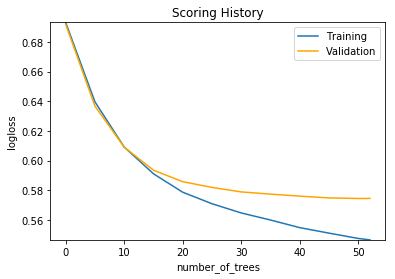

In [0]:
model.plot()

In [0]:

location_name='Qatar'
updated_on='2020-11-08'
path_tomodel="/dbfs/FileStore/df/Churn_Models/h2o_leader_model_train_"+location_name+"_"+updated_on+".model"


In [0]:
lb = automlEstimator.getLeaderboard()
lb

In [0]:
model